In [45]:
import pandas as pd
import sklearn.model_selection

In [46]:
from datasets import load_dataset

dataset = load_dataset("mstz/wine", "wine")

Found cached dataset wine (C:/Users/s487176/.cache/huggingface/datasets/mstz___wine/wine/1.0.0/0913b614badc418a000d75d098776831f39ebf5ee208ecd3cfad4d5db1418d76)


  0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
dataset["train"]

Dataset({
    features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'color'],
    num_rows: 6497
})

In [48]:
wine_dataset = pd.DataFrame(dataset["train"])

In [49]:
wine_dataset.head()# podgląd danych

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      0  
1      9.8        5      0  
2      9.8        5      0  
3      9.8        6      0  
4      9.4        5      0

In [50]:
wine_dataset.describe(include='all')

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

<Axes: >

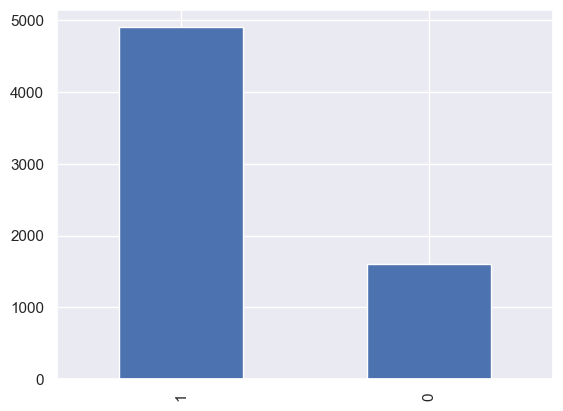

In [51]:
wine_dataset["color"].value_counts().plot(kind="bar")




In [52]:
wine_dataset["fixed_acidity"].std()

1.2964337577998153

In [53]:
import numpy as np
np.where(pd.isnull(wine_dataset))## sprawdzanie czy istnieją puste wartości

(array([], dtype=int64), array([], dtype=int64))

In [54]:
for column in wine_dataset.columns:
    wine_dataset[column] = wine_dataset[column]  / wine_dataset[column].abs().max() # normalizacja

In [55]:
wine_dataset.describe(include='all') # sprawdzanie wartości po znormalizowaniu

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.453793          0.214978     0.191948        0.082724   
std         0.081537          0.104200     0.087541        0.072307   
min         0.238994          0.050633     0.000000        0.009119   
25%         0.402516          0.145570     0.150602        0.027356   
50%         0.440252          0.183544     0.186747        0.045593   
75%         0.484277          0.253165     0.234940        0.123100   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.091708             0.105624              0.263056     0.957378   
std       0.057338             0.061417              0.128459     0.002886   
min       0.014730             0.003460              0.013636     0.950076   
25%       0.062193             0.058824              0.175000     0.955110   
50%       0.076923             0.100346              0.268182     0.957564   
75%       0.106383             0.141869              0.354545     0.959585   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.802619     0.265634     0.704148     0.646486     0.753886  
std       0.040097     0.074403     0.080048     0.097028     0.430779  
min       0.678304     0.110000     0.536913     0.333333     0.000000  
25%       0.775561     0.215000     0.637584     0.555556     1.000000  
50%       0.800499     0.255000     0.691275     0.666667     1.000000  
75%       0.827930     0.300000     0.758389     0.666667     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [56]:
wine_dataset["fixed_acidity"].nlargest(10) #sprawdza czy najwyższe wartości mają sens

652     1.000000
442     0.981132
557     0.981132
554     0.974843
555     0.974843
243     0.943396
244     0.943396
544     0.899371
3125    0.893082
374     0.880503
Name: fixed_acidity, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
wine_train, wine_test = sklearn.model_selection.train_test_split(wine_dataset, test_size=0.1, random_state=1, stratify=wine_dataset["color"])
wine_train["color"].value_counts() 
# podzielenie na train i test

1.0    4408
0.0    1439
Name: color, dtype: int64

In [58]:
wine_test["color"].value_counts()

1.0    490
0.0    160
Name: color, dtype: int64

In [59]:
wine_test, wine_val = sklearn.model_selection.train_test_split(wine_test, test_size=0.5, random_state=1, stratify=wine_test["color"]) # podzielenie na test i validation

In [60]:
wine_test["color"].value_counts()

1.0    245
0.0     80
Name: color, dtype: int64

In [61]:
wine_val["color"].value_counts()

1.0    245
0.0     80
Name: color, dtype: int64

In [62]:
import seaborn as sns
sns.set_theme()

In [63]:
len(wine_dataset.columns)

13

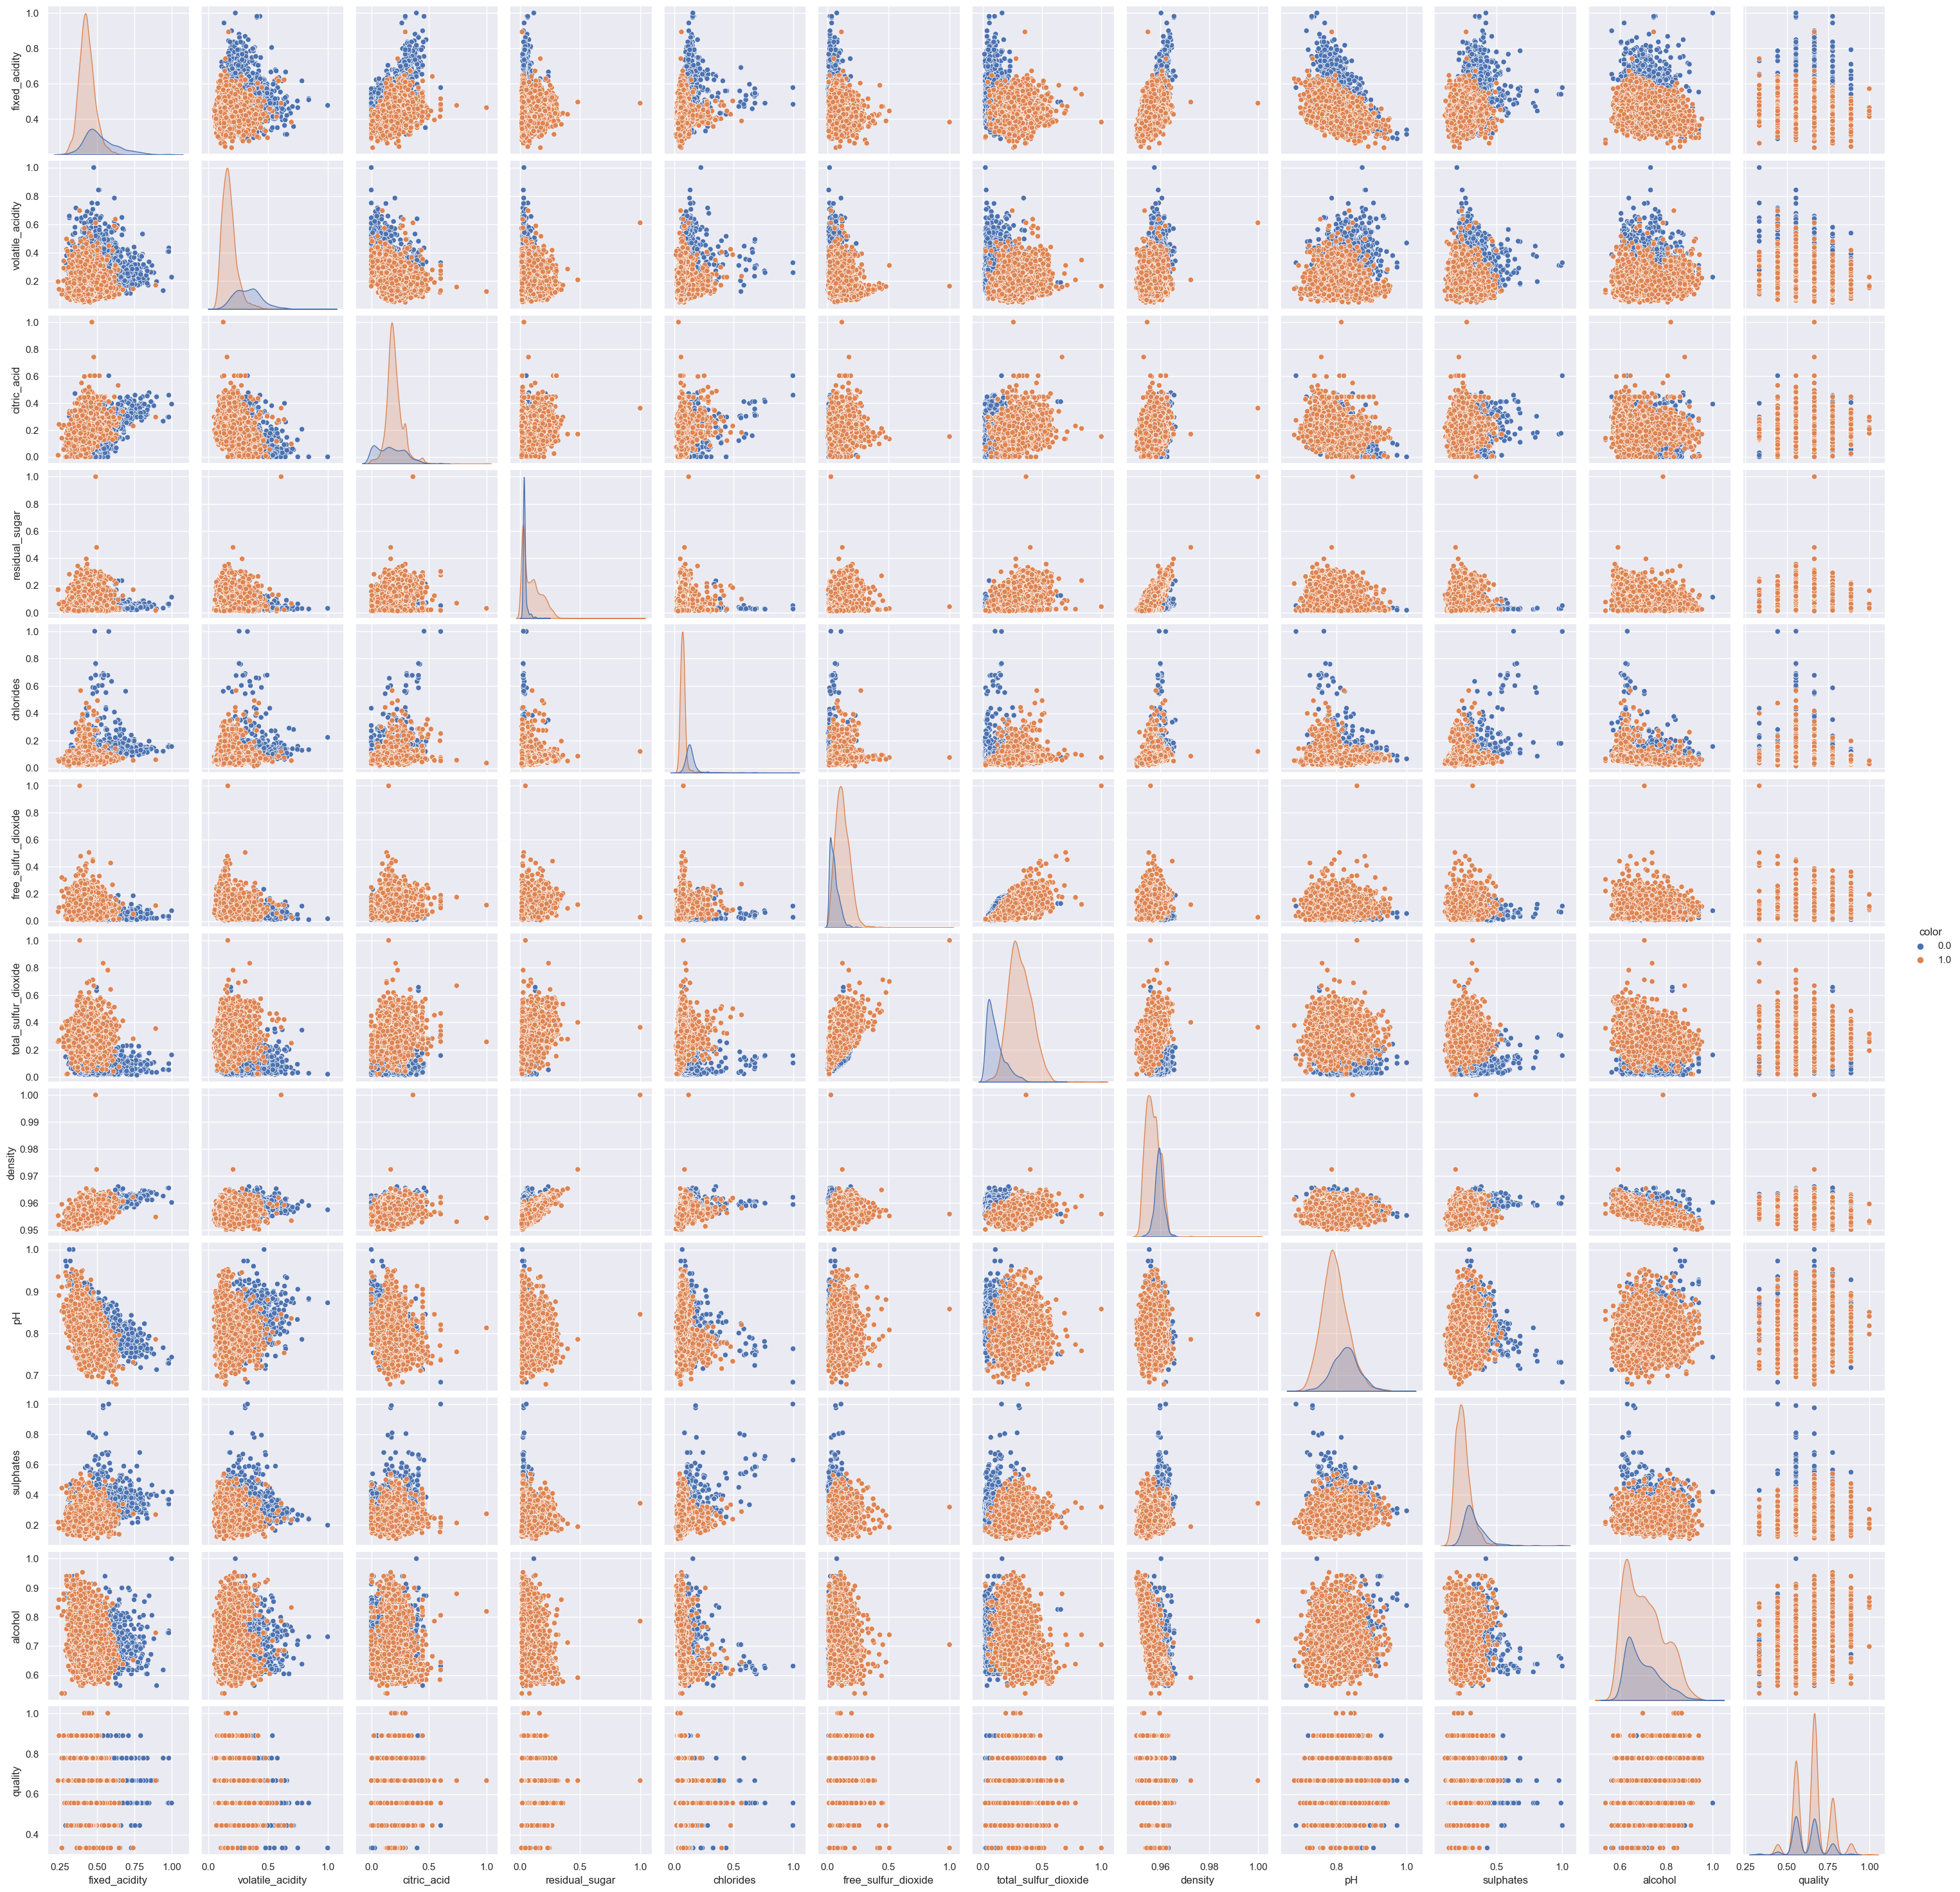

In [64]:
sns.pairplot(data=wine_dataset, hue="color")

In [65]:
wine_test.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        0.448244          0.217069     0.180630        0.078990   
std         0.074301          0.107627     0.078046        0.070045   
min         0.314465          0.063291     0.000000        0.012158   
25%         0.402516          0.145570     0.144578        0.027356   
50%         0.433962          0.177215     0.180723        0.042553   
75%         0.471698          0.253165     0.222892        0.113982   
max         0.817610          0.569620     0.445783        0.334347   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.088742             0.103024              0.257462    0.957255   
std      0.051400             0.054750              0.125165    0.002786   
min      0.031097             0.010381              0.020455    0.951116   
25%      0.060556             0.058824              0.168182    0.955168   
50%      0.078560             0.100346              0.261364    0.957478   
75%      0.101473             0.141869              0.343182    0.959354   
max      0.679214             0.231834              0.575000    0.965264   

               pH   sulphates     alcohol     quality       color  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     0.803553    0.263877    0.703930    0.646154    0.753846  
std      0.039808    0.072275    0.078704    0.095014    0.431433  
min      0.713217    0.130000    0.570470    0.333333    0.000000  
25%      0.775561    0.210000    0.637584    0.555556    1.000000  
50%      0.800499    0.250000    0.691275    0.666667    1.000000  
75%      0.827930    0.300000    0.758389    0.666667    1.000000  
max      0.917706    0.585000    0.939597    1.000000    1.000000

In [66]:
wine_train.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        0.453848          0.215061     0.192235        0.082331   
std         0.081742          0.104315     0.088036        0.071982   
min         0.238994          0.050633     0.000000        0.009119   
25%         0.402516          0.145570     0.150602        0.027356   
50%         0.440252          0.183544     0.186747        0.045593   
75%         0.484277          0.253165     0.234940        0.123100   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.092161             0.105659              0.262894     0.957364   
std       0.058619             0.061749              0.128256     0.002882   
min       0.014730             0.003460              0.013636     0.950076   
25%       0.062193             0.058824              0.176136     0.955071   
50%       0.076923             0.100346              0.268182     0.957516   
75%       0.106383             0.141869              0.353409     0.959581   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality        color  
count  5847.000000  5847.000000  5847.000000  5847.000000  5847.000000  
mean      0.802569     0.265798     0.704326     0.646732     0.753891  
std       0.039880     0.074864     0.079852     0.096928     0.430780  
min       0.678304     0.110000     0.536913     0.333333     0.000000  
25%       0.775561     0.215000     0.637584     0.555556     1.000000  
50%       0.800499     0.255000     0.691275     0.666667     1.000000  
75%       0.827930     0.300000     0.758389     0.666667     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [67]:
wine_val.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        0.458355          0.211412     0.198091        0.093521   
std         0.084621          0.098749     0.086862        0.079346   
min         0.295597          0.056962     0.000000        0.012158   
25%         0.402516          0.145570     0.156627        0.030395   
50%         0.446541          0.183544     0.186747        0.069149   
75%         0.490566          0.253165     0.240964        0.133739   
max         0.943396          0.746835     0.445783        0.480243   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.086537             0.107596              0.271556    0.957757   
std      0.035141             0.061805              0.135185    0.003031   
min      0.019640             0.010381              0.018182    0.950413   
25%      0.063830             0.055363              0.179545    0.955456   
50%      0.078560             0.100346              0.284091    0.957978   
75%      0.098200             0.155709              0.370455    0.960028   
max      0.278232             0.266436              0.570455    0.972396   

               pH   sulphates     alcohol     quality       color  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     0.802570    0.264446    0.701160    0.642393    0.753846  
std      0.044183    0.068086    0.084939    0.100957    0.431433  
min      0.715711    0.140000    0.563758    0.333333    0.000000  
25%      0.773067    0.215000    0.630872    0.555556    1.000000  
50%      0.800499    0.250000    0.684564    0.666667    1.000000  
75%      0.827930    0.305000    0.758389    0.666667    1.000000  
max      1.000000    0.570000    0.939597    0.888889    1.000000